### **1. Classification (Logistic Regression and Linear Discriminant Analysis)**

**Exercise 1**

In [75]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Calculate class probabilities
probabilities = model.predict_proba(X)[:, 1]

# Classify based on a 0.5 threshold
predictions = (probabilities >= 0.5).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.86
Precision: 0.87
Recall: 0.85


**Exercise 2**

In [76]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Generate synthetic multi-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X, y)

# Predict the classes
predictions = model.predict(X)

# Evaluate model performance
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions, average='macro')
f1 = f1_score(y, predictions, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.70
Precision: 0.70
F1 Score: 0.70


**Exercise 3**

In [77]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_probabilities = linear_model.predict(X)

# Fit Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)
logistic_probabilities = logistic_model.predict_proba(X)[:, 1]

# Evaluate model performance using ROC-AUC
linear_roc_auc = roc_auc_score(y, linear_probabilities)
logistic_roc_auc = roc_auc_score(y, logistic_probabilities)

print(f'Linear Regression ROC-AUC: {linear_roc_auc:.2f}')
print(f'Logistic Regression ROC-AUC: {logistic_roc_auc:.2f}')

Linear Regression ROC-AUC: 0.93
Logistic Regression ROC-AUC: 0.93


**Exercise 4**

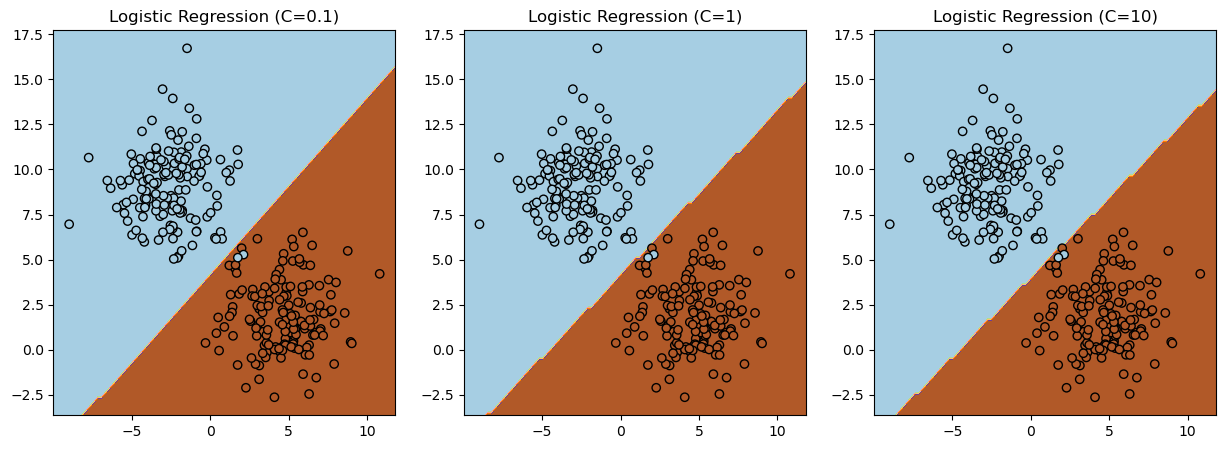

Confusion Matrix (C=0.1):
[[148   2]
 [  0 150]]
Accuracy (C=0.1): 0.99

Confusion Matrix (C=1):
[[148   2]
 [  0 150]]
Accuracy (C=1): 0.99

Confusion Matrix (C=10):
[[148   2]
 [  0 150]]
Accuracy (C=10): 0.99



In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Generate synthetic 2D dataset
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=2.0)

# Fit Logistic Regression model with different C values
C_values = [0.1, 1, 10]
models = [LogisticRegression(C=C, solver='lbfgs').fit(X, y) for C in C_values]

# Plot decision boundaries
plt.figure(figsize=(15, 5))
for i, model in enumerate(models):
    plt.subplot(1, 3, i + 1)
    DecisionBoundaryDisplay.from_estimator(model, X, response_method='predict', cmap=plt.cm.Paired, ax=plt.gca())
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(f'Logistic Regression (C={C_values[i]})')

plt.show()

# Assess model performance
for i, model in enumerate(models):
    predictions = model.predict(X)
    cm = confusion_matrix(y, predictions)
    accuracy = accuracy_score(y, predictions)
    print(f'Confusion Matrix (C={C_values[i]}):\n{cm}')
    print(f'Accuracy (C={C_values[i]}): {accuracy:.2f}\n')

**Exercise 5**

In [79]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Interpret the model’s coefficients
coefficients = model.coef_
print("Model coefficients:", coefficients)

# Evaluate model performance
predictions = model.predict(X)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Model coefficients: [[ 0.00752111 -0.08425151  0.15942837 -0.07569245  0.55062604  0.10573659
  -0.10378383 -0.28155077  0.34371611  0.5830273  -0.01283006  0.1971906
  -0.39556177 -0.09722573 -0.01331282 -0.05088778 -0.21957574  0.07369041
   0.03536935  0.04044793]]
Precision: 0.87
Recall: 0.85
F1 Score: 0.86


### **2. Tree-Based Methods (Decision Trees)**

**Exercise 1**

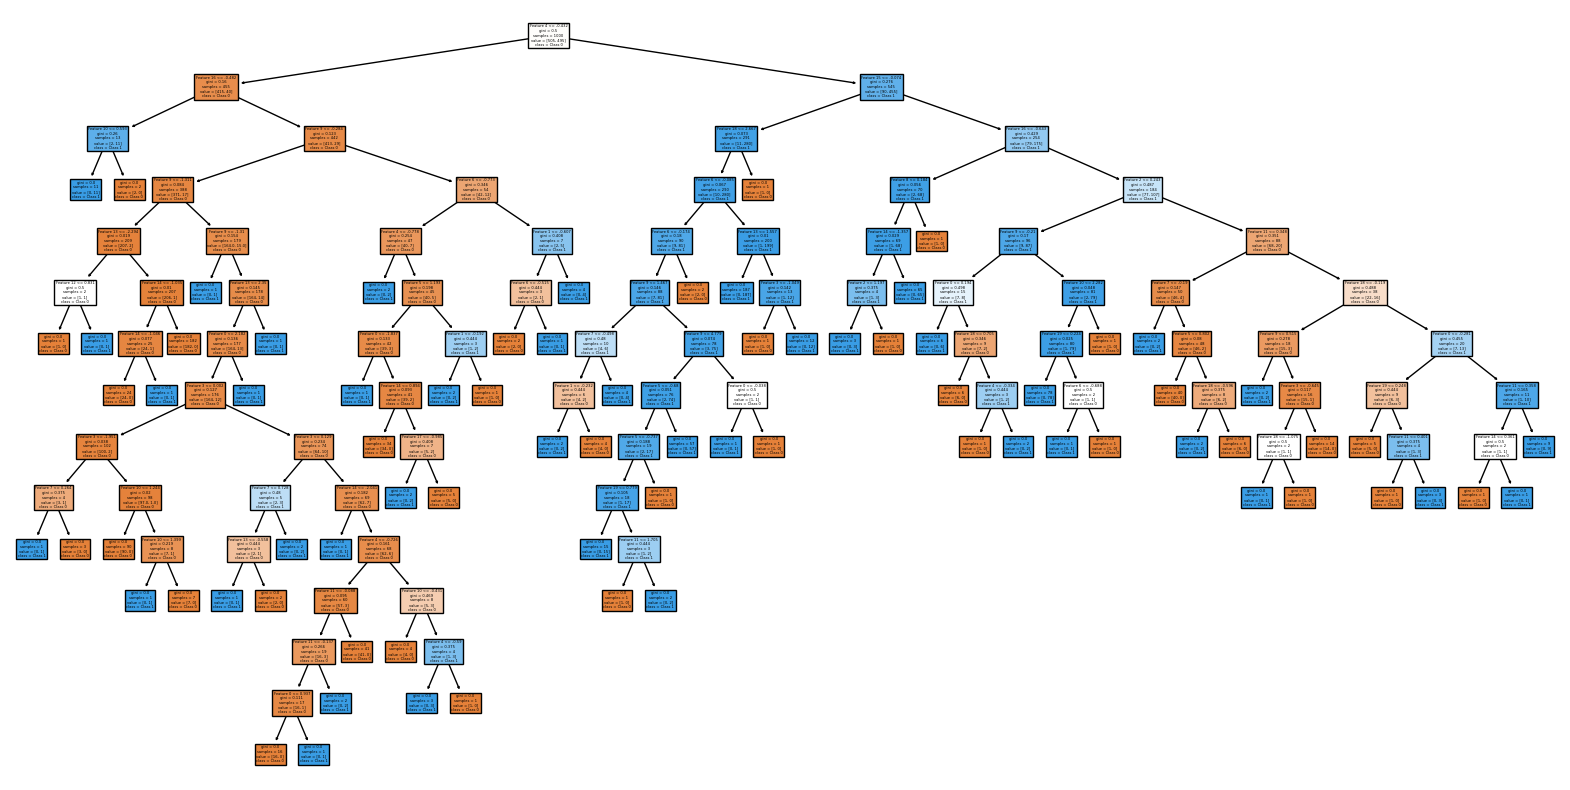

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Fit Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])], class_names=['Class 0', 'Class 1'])
plt.show()

# Evaluate model performance
predictions = model.predict(X)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

**Exercise 2**

In [81]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Fit Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X, y)

# Predict the target values
predictions = model.predict(X)

# Evaluate model performance
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


**Exercise 3**

In [82]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use GridSearchCV to search over max_depth for DecisionTreeClassifier
param_grid = {'max_depth': np.arange(1, 21)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model using accuracy_score and f1_score
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f'Best max_depth: {grid_search.best_params_["max_depth"]}')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print(f'Training F1 Score: {train_f1:.2f}')
print(f'Testing F1 Score: {test_f1:.2f}')


Best max_depth: 4
Training Accuracy: 0.94
Testing Accuracy: 0.91
Training F1 Score: 0.94
Testing F1 Score: 0.90


**Exercise 4**

In [83]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Decision Tree model with varying max_depth
max_depths = [3, 5, 7, 10, None]
results = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate model performance on training data
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_recall = recall_score(y_train, train_predictions)
    
    # Evaluate model performance on testing data
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    
    results.append({
        'max_depth': max_depth,
        'train_accuracy': train_accuracy,
        'train_recall': train_recall,
        'test_accuracy': test_accuracy,
        'test_recall': test_recall
    })

# Print the results
for result in results:
    print(f"Max Depth: {result['max_depth']}")
    print(f"Training Accuracy: {result['train_accuracy']:.2f}, Training Recall: {result['train_recall']:.2f}")
    print(f"Testing Accuracy: {result['test_accuracy']:.2f}, Testing Recall: {result['test_recall']:.2f}\n")

Max Depth: 3
Training Accuracy: 0.92, Training Recall: 0.85
Testing Accuracy: 0.89, Testing Recall: 0.83

Max Depth: 5
Training Accuracy: 0.96, Training Recall: 0.92
Testing Accuracy: 0.91, Testing Recall: 0.90

Max Depth: 7
Training Accuracy: 0.97, Training Recall: 0.95
Testing Accuracy: 0.89, Testing Recall: 0.89

Max Depth: 10
Training Accuracy: 0.99, Training Recall: 0.99
Testing Accuracy: 0.87, Testing Recall: 0.90

Max Depth: None
Training Accuracy: 1.00, Training Recall: 1.00
Testing Accuracy: 0.87, Testing Recall: 0.89



**Exercise 5**

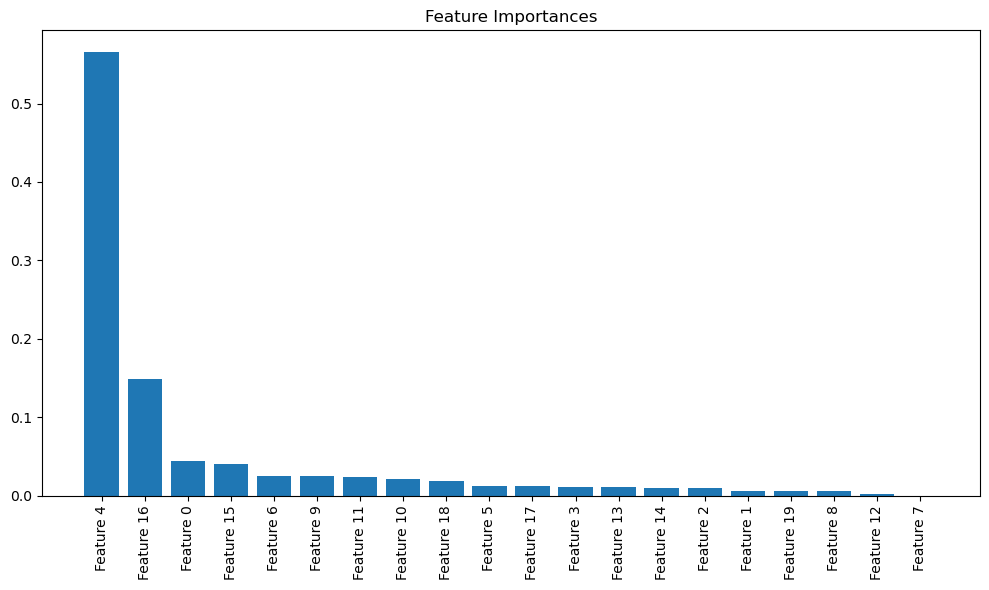

Precision: 1.00
Accuracy: 1.00


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Fit Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model performance
predictions = model.predict(X)
precision = precision_score(y, predictions)
accuracy = accuracy_score(y, predictions)

print(f'Precision: {precision:.2f}')
print(f'Accuracy: {accuracy:.2f}')

### **3. Support Vector Machines (SVM)**

**Exercise 1**

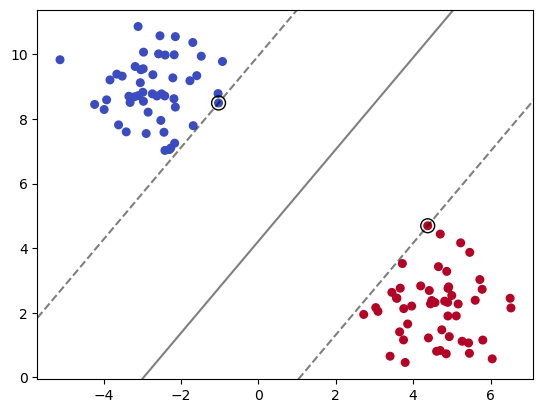

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate synthetic 2D dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Fit SVM model with linear kernel
model = SVC(kernel='linear')
model.fit(X, y)

# Visualize the hyperplane, support vectors, and margins
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Evaluate model performance
predictions = model.predict(X)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

**Exercise 2**

In [86]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Generate synthetic non-linearly separable dataset
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit SVM models with linear and RBF kernels
linear_svm = SVC(kernel='linear', probability=True)
rbf_svm = SVC(kernel='rbf', probability=True)

linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

# Evaluate the models using accuracy and ROC-AUC
y_pred_linear = linear_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)

y_prob_linear = linear_svm.predict_proba(X_test)[:, 1]
y_prob_rbf = rbf_svm.predict_proba(X_test)[:, 1]

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

roc_auc_linear = roc_auc_score(y_test, y_prob_linear)
roc_auc_rbf = roc_auc_score(y_test, y_prob_rbf)

print(f'Linear SVM Accuracy: {accuracy_linear:.2f}')
print(f'RBF SVM Accuracy: {accuracy_rbf:.2f}')
print(f'Linear SVM ROC-AUC: {roc_auc_linear:.2f}')
print(f'RBF SVM ROC-AUC: {roc_auc_rbf:.2f}')

Linear SVM Accuracy: 0.54
RBF SVM Accuracy: 0.99
Linear SVM ROC-AUC: 0.53
RBF SVM ROC-AUC: 1.00


**Exercise 3**

In [87]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit SVM models with linear kernel and varying C values
C_values = [0.01, 0.1, 1, 10, 100]
results = []

for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    
    # Evaluate model performance
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    results.append({
        'C': C,
        'accuracy': accuracy,
        'precision': precision
    })

# Print the results
for result in results:
    print(f"C: {result['C']}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Precision: {result['precision']:.2f}\n")

C: 0.01
Accuracy: 0.84
Precision: 0.81

C: 0.1
Accuracy: 0.85
Precision: 0.82

C: 1
Accuracy: 0.84
Precision: 0.82

C: 10
Accuracy: 0.84
Precision: 0.82

C: 100
Accuracy: 0.84
Precision: 0.82



**Exercise 4**

In [88]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Generate synthetic non-linearly separable dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to search over the parameter grid
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score)
}

grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit='accuracy', cv=5)
grid_search.fit(X, y)

# Get the best model and evaluate its performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Cross-validated scores
cv_accuracy = cross_val_score(best_model, X, y, cv=5, scoring='accuracy').mean()
cv_f1 = cross_val_score(best_model, X, y, cv=5, scoring='f1').mean()

print(f'Best Parameters: {best_params}')
print(f'Cross-validated Accuracy: {cv_accuracy:.2f}')
print(f'Cross-validated F1 Score: {cv_f1:.2f}')

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Cross-validated Accuracy: 1.00
Cross-validated F1 Score: 1.00


**Exercise 5**

In [89]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Transform the dataset with polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Fit Linear SVM model on the transformed dataset
model = LinearSVC(max_iter=10000, dual = "auto")
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.83
Recall: 0.83


### **4. Decision Trees and XGBoost**

**Exercise 1**

In [90]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.87
F1 Score: 0.87


**Exercise 2**

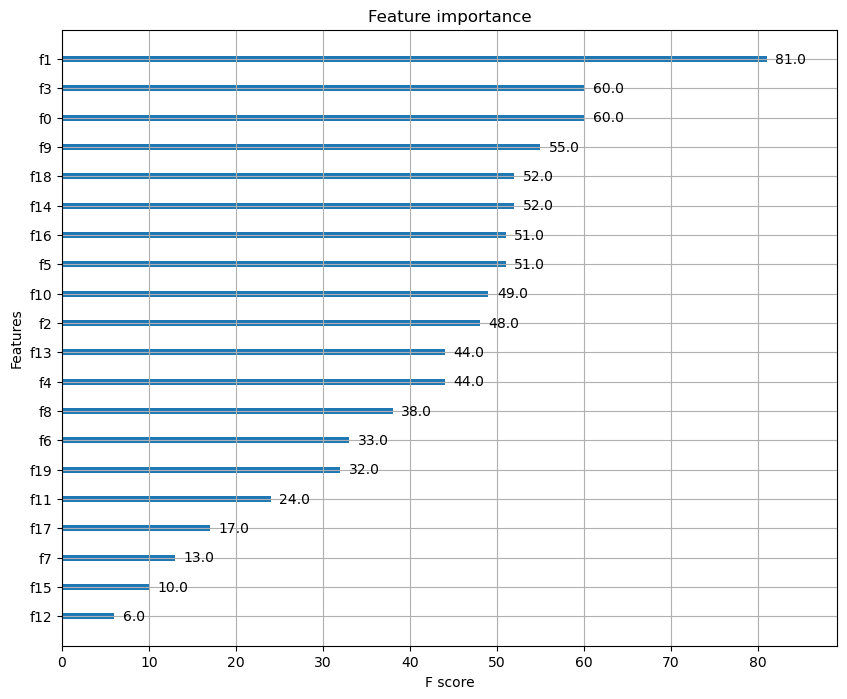

Precision: 0.88
Recall: 0.93
ROC-AUC: 0.96


In [91]:
import numpy as np
from sklearn.datasets import make_classification
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit XGBoost model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 8))
plot_importance(model, ax=plt.gca())
plt.show()

# Evaluate model performance
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


**Exercise 3**

In [92]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier, cv, DMatrix

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Convert the dataset into DMatrix format required by xgboost
dtrain = DMatrix(X, label=y)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1
}

# Perform cross-validation to find the optimal number of boosting rounds
cv_results = cv(
    params,
    dtrain,
    num_boost_round=100,
    nfold=5,
    metrics={'error', 'logloss'},
    early_stopping_rounds=10,
    as_pandas=True,
    seed=42
)

# Get the optimal number of boosting rounds
optimal_boost_rounds = len(cv_results)

# Train the model with the optimal number of boosting rounds
model = XGBClassifier(n_estimators=optimal_boost_rounds, max_depth=3, eta=0.1, eval_metric='logloss')
model.fit(X, y)

# Evaluate model performance using cross-validated accuracy and F1-score
cv_accuracy = np.mean(cross_val_score(model, X, y, cv=5, scoring='accuracy'))
cv_f1 = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1'))

print(f'Optimal number of boosting rounds: {optimal_boost_rounds}')
print(f'Cross-validated Accuracy: {cv_accuracy:.2f}')
print(f'Cross-validated F1 Score: {cv_f1:.2f}')

Optimal number of boosting rounds: 42
Cross-validated Accuracy: 0.92
Cross-validated F1 Score: 0.92


**Exercise 4**

Learning Rate: 0.01, MSE: 15288.29, Accuracy: 0.85
Learning Rate: 0.05, MSE: 5681.90, Accuracy: 0.88
Learning Rate: 0.1, MSE: 4828.39, Accuracy: 0.89
Learning Rate: 0.2, MSE: 5540.98, Accuracy: 0.89
Learning Rate: 0.3, MSE: 5683.44, Accuracy: 0.88


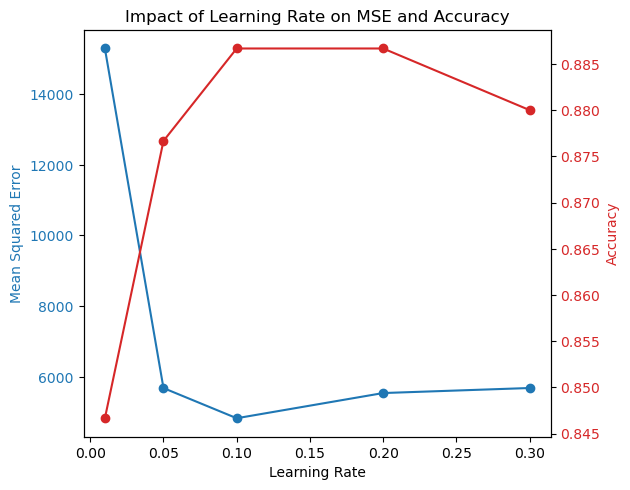

In [93]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert regression target to binary classification for accuracy measurement
y_class = (y > y.mean()).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train XGBRegressor with different learning_rate values
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
mse_values = []
accuracy_values = []

for lr in learning_rates:
    model = XGBRegressor(learning_rate=lr, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > y_pred.mean()).astype(int)
    
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    
    mse_values.append(mse)
    accuracy_values.append(accuracy)
    
    print(f'Learning Rate: {lr}, MSE: {mse:.2f}, Accuracy: {accuracy:.2f}')

# Plot the impact of learning rate on MSE and Accuracy
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(learning_rates, mse_values, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(learning_rates, accuracy_values, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Impact of Learning Rate on MSE and Accuracy')
plt.show()

**Exercise 5**

In [94]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit XGBoost model with early stopping
model = XGBClassifier(eval_metric='logloss',
          early_stopping_rounds=10)
model.fit(X_train, y_train, 
          eval_set=[(X_test, y_test)], 
          verbose=False)

# Evaluate model performance
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.89
F1 Score: 0.92


### **5. Trees, Forests, Bagging, and Boosting**

**Exercise 1**

In [95]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a single DecisionTreeClassifier
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_single = single_tree.predict(X_test)

# Evaluate single tree performance
accuracy_single = accuracy_score(y_test, y_pred_single)
f1_single = f1_score(y_test, y_pred_single)

# Fit a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

# Evaluate bagging ensemble performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)

# Compare performance
print(f'Single Decision Tree - Accuracy: {accuracy_single:.2f}, F1 Score: {f1_single:.2f}')
print(f'Bagging Ensemble - Accuracy: {accuracy_bagging:.2f}, F1 Score: {f1_bagging:.2f}')

Single Decision Tree - Accuracy: 0.87, F1 Score: 0.87
Bagging Ensemble - Accuracy: 0.92, F1 Score: 0.92


**Exercise 2**

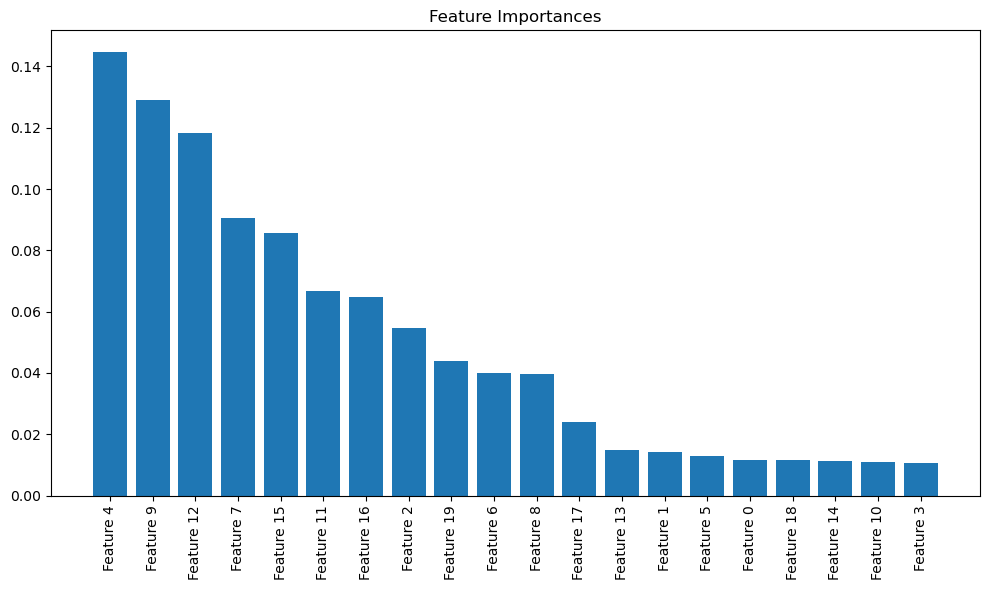

Precision: 0.92
Recall: 0.94


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model performance
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

**Exercise 3**

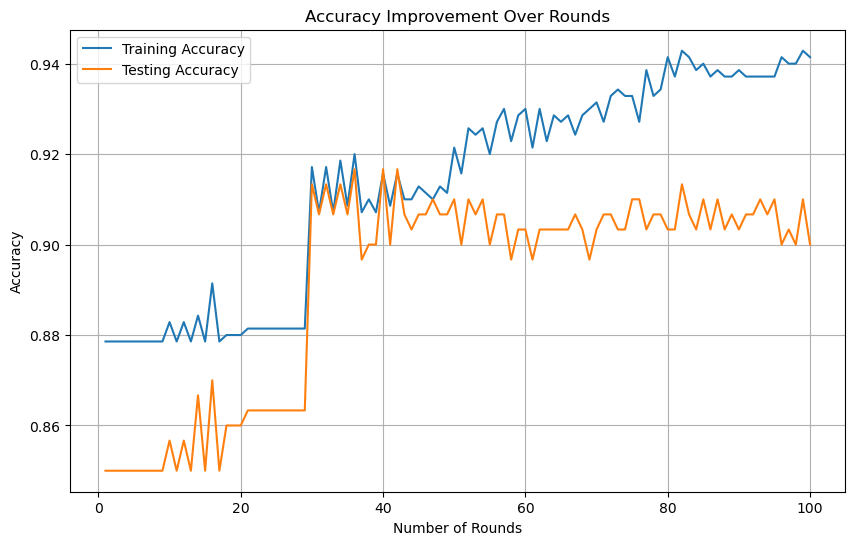

In [97]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit AdaBoostClassifier with DecisionTreeClassifier(max_depth=1) as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_estimator,algorithm='SAMME', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Track accuracy improvement over rounds
train_accuracies = []
test_accuracies = []

for y_pred_train, y_pred_test in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))

# Plot accuracy improvement over rounds
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Rounds')
plt.ylabel('Accuracy')
plt.title('Accuracy Improvement Over Rounds')
plt.legend()
plt.grid(True)
plt.show()


**Exercise 4**

In [98]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit BaggingClassifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

# Fit AdaBoostClassifier
boosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), algorithm='SAMME', n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)

# Evaluate both models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)

accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
recall_boosting = recall_score(y_test, y_pred_boosting)

print(f'Bagging - Accuracy: {accuracy_bagging:.2f}, Recall: {recall_bagging:.2f}')
print(f'Boosting - Accuracy: {accuracy_boosting:.2f}, Recall: {recall_boosting:.2f}')

Bagging - Accuracy: 0.92, Recall: 0.93
Boosting - Accuracy: 0.91, Recall: 0.90


**Exercise 5**

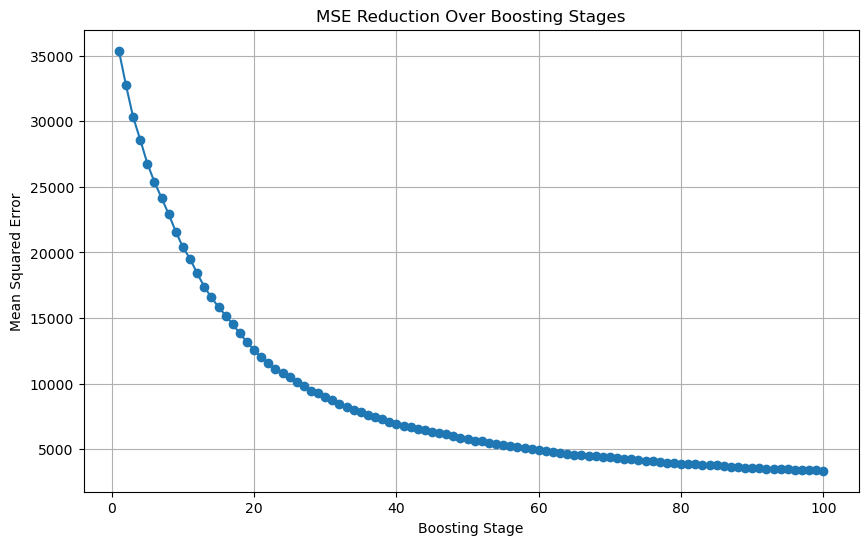

In [99]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Track MSE at each boosting stage
mse_values = []

for y_pred in model.staged_predict(X_test):
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE reduction over boosting stages
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o')
plt.xlabel('Boosting Stage')
plt.ylabel('Mean Squared Error')
plt.title('MSE Reduction Over Boosting Stages')
plt.grid(True)
plt.show()